In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<hr color='cian'>
<h4 align='right'>Open the data</h4>

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/archiveDE_clean_jan2022.csv'

In [5]:
with open(path, 'r') as reader:
  for index, line in enumerate(reader.readlines()):
    if (index<10):
      print(index, line)

0 ,created_at,text,user,source,favorite_count,retweet_count,location,verified,screen_name

1 0,2022-01-27 11:00:45+00:00,BTW: Joe Rogan ist übrigens nicht nur wegen COVID-Desinformation ungeil. Bei ihm tauchen auch gerne mal Personen vo… https://t.co/PJYxsEQsWm,"{'id': 83573370, 'id_str': '83573370', 'name': 'Sascha Morlok', 'screen_name': 'modgamers', 'location': 'Hamburg, Germany', 'description': 'Er, he/him | Roboter-Mensch-Kontakter. Schreibe mit an #Shadowrun für @pegasusspiele #pnpde, Unterstützen: https://t.co/YQjSbLnjsA\n\nNazis = Schlecht', 'url': 'https://t.co/UmdNYs80AZ', 'entities': {'url': {'urls': [{'url': 'https://t.co/UmdNYs80AZ', 'expanded_url': 'https://rpggeek.com/rpgdesigner/55518/sascha-morlok', 'display_url': 'rpggeek.com/rpgdesigner/55…', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/YQjSbLnjsA', 'expanded_url': 'http://steadyhq.com/de/saschasr', 'display_url': 'steadyhq.com/de/saschasr', 'indices': [107, 130]}]}}, 'protected': False, 'fol

In [6]:
df = pd.read_csv(path, sep=',',
                 encoding='UTF-8',
                 skip_blank_lines=False,
                 usecols=['created_at', 'text', 'source',
                          'favorite_count', 'retweet_count',
                          'location', 'verified', 'screen_name'])

In [7]:
df.head()

,created_at,text,source,favorite_count,retweet_count,location,verified,screen_name
0,2022-01-27 11:00:45+00:00,BTW: Joe Rogan ist übrigens nicht nur wegen CO...,Tw Web AP,0,0,"Hamburg, Germany",No,modgamers
1,2022-01-27 11:00:35+00:00,Welttag der Bildung: Covid-19-Pandemie verschä...,website,0,0,Deutschland,No,_fkp_
2,2022-01-27 11:00:27+00:00,"Experten, darunter \nRobert Garry &amp; Mike F...",Tw Web AP,0,0,Katzenfurt,No,WillyPe37974835
3,2022-01-27 11:00:17+00:00,@u1829387190039 @SWagenknecht verpflichtend we...,Tw Web AP,0,0,NaN,No,MarioQuade
4,2022-01-27 11:00:16+00:00,@DBOnTweets @Ricarda_Lang Mit falschen Zahlen ...,iPhone,0,0,NaN,No,fantasmex


In [8]:
df.isna().value_counts()

created_at  text   source  favorite_count  retweet_count  location  verified  screen_name
False       False  False   False           False          False     False     False          170
                                                          True      False     False          130
dtype: int64

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      300 non-null    datetime64[ns, UTC]
 1   text            300 non-null    object             
 2   source          300 non-null    object             
 3   favorite_count  300 non-null    int64              
 4   retweet_count   300 non-null    int64              
 5   location        170 non-null    object             
 6   verified        300 non-null    object             
 7   screen_name     300 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 18.9+ KB


<hr color='cian'>
<h4 align='right'>Visualization</h4>

<h5 align='right'>WordCloud in 300 tweets about tweet</h5>

In [11]:

df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
stopwords = nltk.corpus.stopwords.words('german')

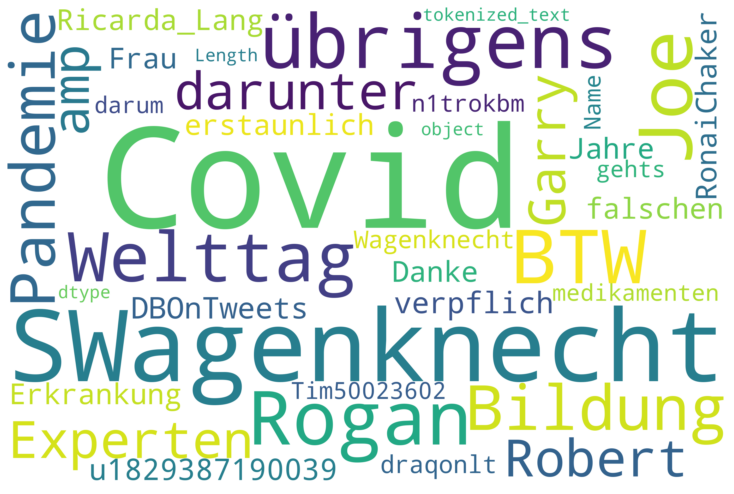

In [12]:
text = df.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h5 align='right'>The tweets most RT</h5>

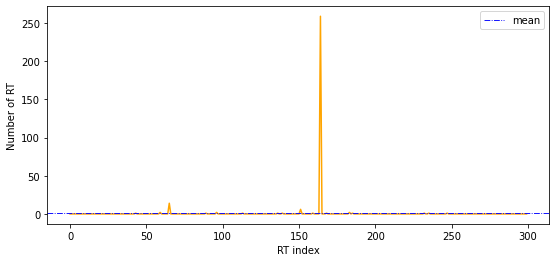

In [13]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(9,4))
plt.plot(df['retweet_count'], color='orange')
plt.axhline(df['retweet_count'].mean(), color='blue', lw='.9',linestyle='-.', label='mean')
plt.xlabel('RT index')
plt.ylabel('Number of RT')
plt.legend(loc='upper right')
plt.savefig('DE_RT.jpg')

<h5 align='right'>Tweets RT above average</h5>

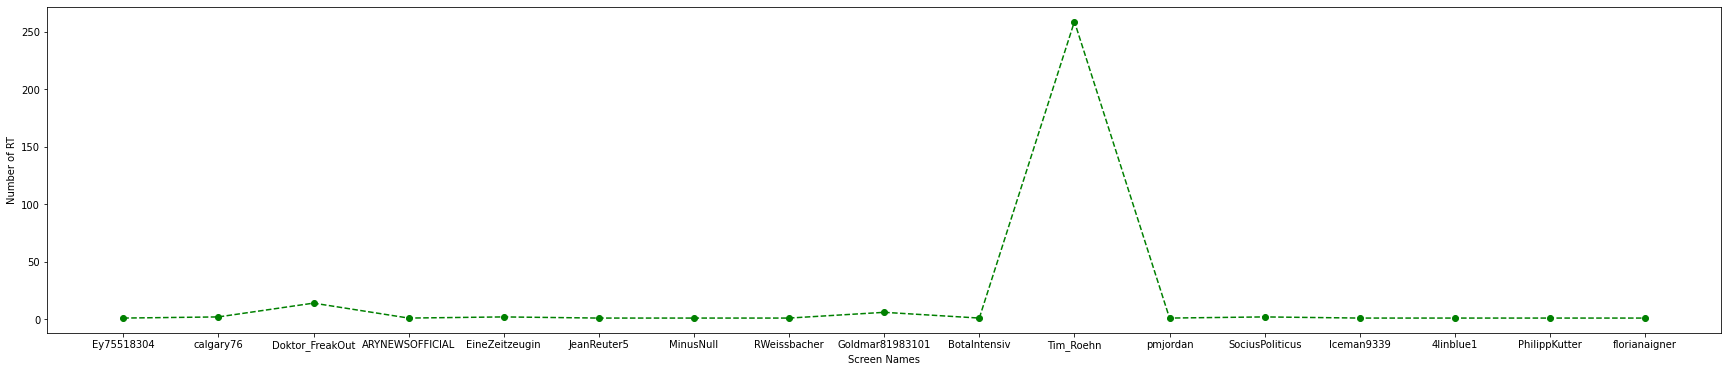

In [14]:
RTmean = (df['retweet_count'] > df['retweet_count'].mean())
RTmean = df[RTmean]
plt.figure(figsize=(30,6))
plt.plot(RTmean['screen_name'],RTmean['retweet_count'], 'go--')
plt.xlabel('Screen Names')
plt.ylabel('Number of RT')
plt.savefig('DE_RTaboveMean.jpg')

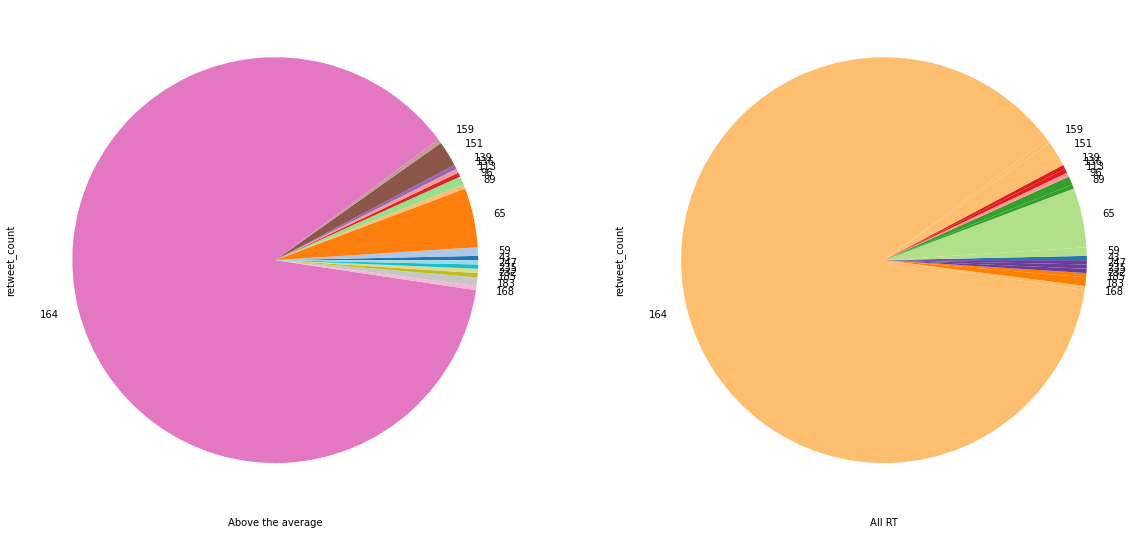

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
RTmean['retweet_count'].plot(kind='pie', colormap='tab20')
plt.xlabel('Above the average')

plt.subplot(1,2,2)
df['retweet_count'].plot(kind='pie', colormap='Paired')
plt.xlabel('All RT')
plt.savefig('DE_RT_audience.jpg')

In [16]:
RTmean['tokenized_text'] = RTmean.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
stopwords = nltk.corpus.stopwords.words('german')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<h5 align='right'>WordCloud with all the RT above the average</h5>

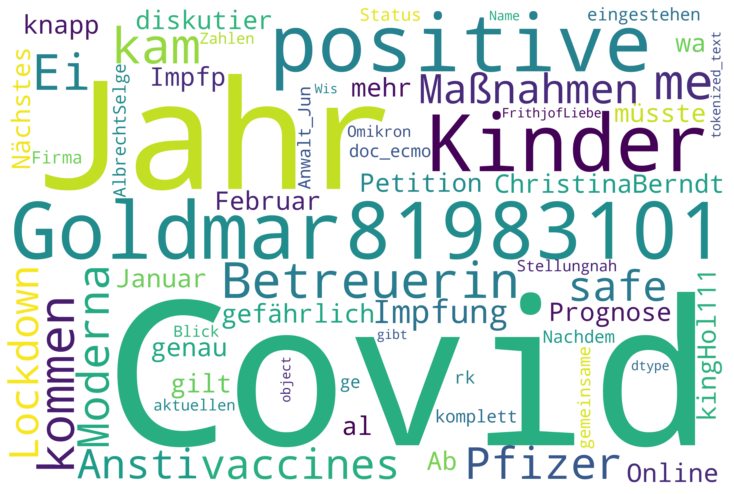

In [17]:
text = RTmean.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Number of Tweets')

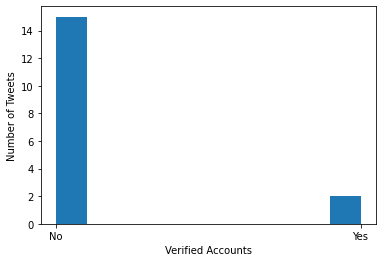

In [18]:
plt.hist(RTmean['verified'])
plt.xlabel('Verified Accounts')
plt.ylabel('Number of Tweets')

<h5 align='right'>One tweet had the biggest impact</h5>

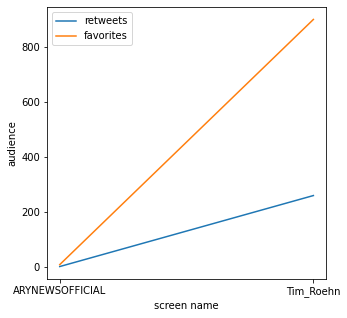

In [19]:
VerY = (RTmean['verified']=='Yes')
VerY = RTmean[VerY]
plt.figure(figsize=(5,5))
plt.plot(VerY['screen_name'], VerY['retweet_count'], label='retweets')
plt.plot(VerY['screen_name'], VerY['favorite_count'], label='favorites')
plt.legend(loc='upper left')
plt.xlabel('screen name')
plt.ylabel('audience')
plt.savefig('RT_byVerifiedAccounts.jpg')

In [20]:
list(VerY.text)

['Pfizer, Moderna covid vaccines safe during in vitro fertilization\n\n#arynews \n\nhttps://t.co/ZUyv85Hktu',
 '„Ab Februar gilt Covid-19 nicht mehr als ‚für die Gesellschaft kritische Krankheit‘. Nachtclubs dürfen dann wieder… https://t.co/uaWY6Gosxi']

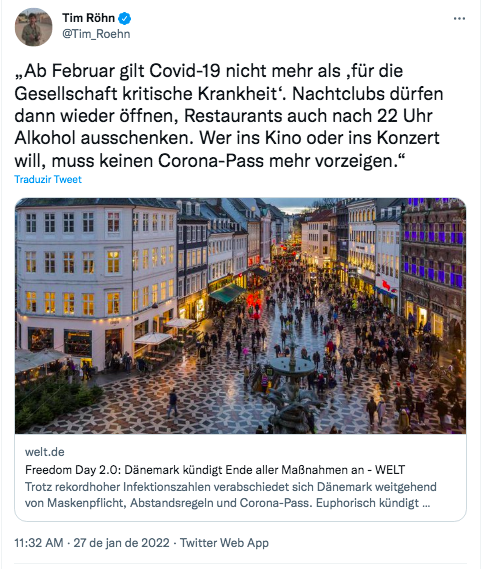


<h5 align='right'>The sources frequency used by DE-tweeters</h5>

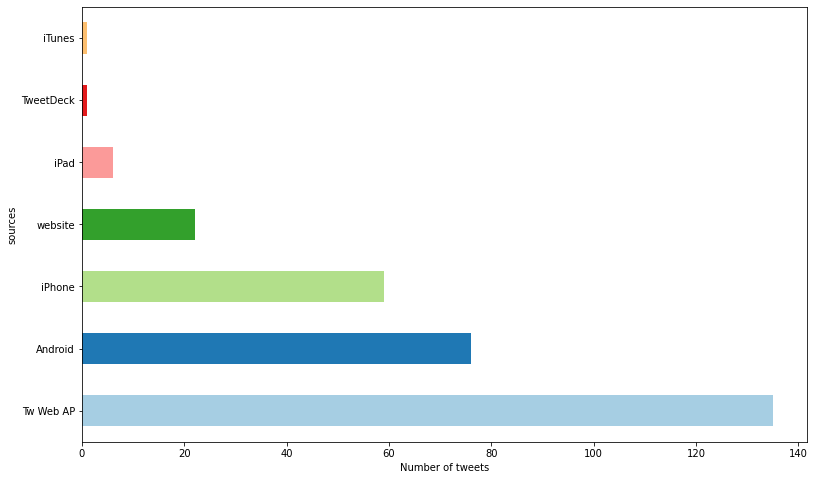

In [21]:
df.source.value_counts().plot(kind='barh', figsize=(13,8),
                              color=plt.cm.Paired(np.arange(len(df['source']))))
plt.xlabel('Number of tweets')
plt.ylabel('sources')
plt.savefig('DE_twitter_source.jpg')